# Image Processing Project by Srutileka S

## Importing libraries 

In [1]:
import os 
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
from skimage.io import imread, imshow 
from skimage.transform import resize 
from skimage.color import rgb2gray
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## Importing working directory 

In [3]:
#import working dir
me= os.listdir("C:/Users/lekas/Desktop/Image dataset/SrutiLeka")
je= os.listdir("C:/Users/lekas/Desktop/Image dataset/JacobElordi")
ss= os.listdir("C:/Users/lekas/Desktop/Image dataset/SydneySweeny")

## Reading images as matrix

In [4]:
limit=10 
me_img=[None]*limit

j=0

for i in me:
    if(j<limit):
        me_img[j]=imread("C:/Users/lekas/Desktop/Image dataset/SrutiLeka/"+i)   
        j+=1
    else:
        break

In [5]:
limit=10 
je_img=[None]*limit

j=0

for i in je:
    if(j<limit):
        je_img[j]=imread("C:/Users/lekas/Desktop/Image dataset/JacobElordi/"+i)   
        j+=1
    else:
        break

In [6]:
limit=10
ss_img=[None]*limit

j=0 
        
for i in ss:
    if(j<limit):
        ss_img[j]=imread("C:/Users/lekas/Desktop/Image dataset/SydneySweeny/"+i)   
        j+=1
    else:
        break 

## Reading images in grayscale

In [7]:
limit=10

me_gray=[None]*limit


j=0

for i in me:
    if(j<limit):
        me_gray[j]=rgb2gray(me_img[j])
        j+=1
    else:
        break

In [8]:
limit=10

je_gray=[None]*limit


j=0

for i in je:
    if(j<limit):
        je_gray[j]=rgb2gray(je_img[j])
        j+=1
    else:
        break

In [9]:
limit=10

ss_gray=[None]*limit


j=0

for i in ss:
    if(j<limit):
        ss_gray[j]=rgb2gray(ss_img[j])
        j+=1
    else:
        break

## Show image 

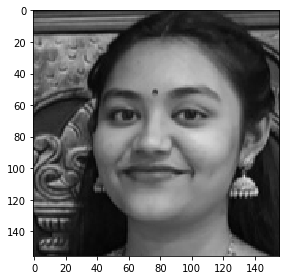

In [10]:
imshow(me_gray[0])

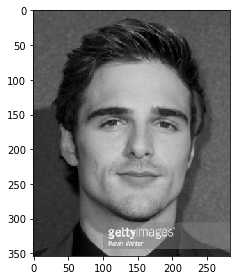

In [11]:
imshow(je_gray[0])

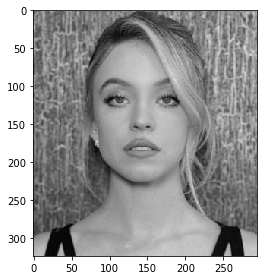

In [12]:
imshow(ss_gray[0])

## Define length 

In [13]:
len_of_me=len(me_gray)
len_of_je=len(je_gray)
len_of_ss=len(ss_gray)

## Resize all images 

In [14]:
for i in range (10):
    m=me_gray[i]
    me_gray[i]=resize(m,(512,512))

In [15]:
for i in range (10):
    j=je_gray[i]
    je_gray[i]=resize(j,(512,512))

In [16]:
for i in range (10):
    s=ss_gray[i]
    ss_gray[i]=resize(s,(512,512))

## Flatten images 

In [17]:
image_size_me=me_gray[0].shape
image_size_je=je_gray[0].shape
image_size_ss=ss_gray[0].shape

flatten_me= image_size_me[0]*image_size_me[1]
flatten_je= image_size_je[0]*image_size_je[1]
flatten_ss= image_size_ss[0]*image_size_ss[1]


In [18]:
for i in range (len_of_me):
    me_gray[i]=np.ndarray.flatten(me_gray[i]).reshape(flatten_me,1)

In [19]:
for i in range (len_of_je):
    je_gray[i]=np.ndarray.flatten(je_gray[i]).reshape(flatten_je,1)

In [20]:
for i in range (len_of_ss):
    ss_gray[i]=np.ndarray.flatten(ss_gray[i]).reshape(flatten_ss,1)

In [21]:
me_gray=np.dstack(me_gray)
je_gray=np.dstack(je_gray)
ss_gray=np.dstack(ss_gray)

In [22]:
me_gray=np.rollaxis(me_gray, axis=2, start=0)
je_gray=np.rollaxis(je_gray, axis=2, start=0)
ss_gray=np.rollaxis(ss_gray, axis=2, start=0)

In [23]:
me_gray=me_gray.reshape(len_of_me,flatten_me)
je_gray=je_gray.reshape(len_of_je,flatten_je)
ss_gray=ss_gray.reshape(len_of_ss,flatten_ss)

## Create Data frames

In [24]:
me_data=pd.DataFrame(me_gray)
je_data=pd.DataFrame(je_gray)
ss_data=pd.DataFrame(ss_gray)

In [25]:
me_data["label"]="Sruti Leka"
je_data["label"]="Jacob Elordi"
ss_data["label"]="Sydney Sweeny"

In [26]:
me_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.117779,0.113830,0.116665,0.120614,0.124562,0.121408,0.113044,0.104680,0.100651,0.106989,...,0.073023,0.072220,0.071707,0.071195,0.073119,0.078365,0.083611,0.087378,0.082132,Sruti Leka
1,0.861309,0.861309,0.861309,0.861309,0.863242,0.864780,0.865203,0.865230,0.864132,0.861832,...,0.725660,0.722036,0.719875,0.734225,0.740765,0.741511,0.738158,0.730461,0.725228,Sruti Leka
2,0.711517,0.711814,0.715757,0.717735,0.718471,0.713284,0.705410,0.701098,0.697891,0.699080,...,0.250051,0.244301,0.238387,0.231941,0.228168,0.230289,0.230302,0.226979,0.226729,Sruti Leka
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.107096,0.103736,0.102248,0.103979,0.107671,0.111363,0.116314,0.126999,0.126999,Sruti Leka
4,0.802803,0.801678,0.804465,0.807251,0.808579,0.809734,0.809755,0.808600,0.807687,0.809319,...,0.864799,0.864406,0.863821,0.865196,0.868459,0.871180,0.869313,0.867446,0.868200,Sruti Leka
5,0.970034,0.970034,0.970034,0.970034,0.970034,0.970976,0.972217,0.973458,0.973956,0.973956,...,0.396986,0.420062,0.444783,0.469505,0.484997,0.471380,0.457762,0.446330,0.459948,Sruti Leka
6,0.288285,0.286340,0.290780,0.295221,0.294163,0.292080,0.289730,0.286988,0.284245,0.285530,...,0.212049,0.229742,0.247435,0.256849,0.260634,0.263065,0.258240,0.253415,0.255528,Sruti Leka
7,0.434534,0.434727,0.434250,0.433774,0.433001,0.432192,0.431780,0.431780,0.431780,0.431780,...,0.343291,0.342573,0.342099,0.342884,0.344881,0.346814,0.348208,0.349601,0.349039,Sruti Leka
8,0.741411,0.740369,0.741809,0.743249,0.745098,0.747522,0.749946,0.751690,0.753130,0.754570,...,0.454274,0.454730,0.455045,0.455045,0.455045,0.454778,0.454323,0.453867,0.454197,Sruti Leka
9,0.202886,0.202040,0.202734,0.203579,0.204424,0.204087,0.203311,0.202536,0.205130,0.210485,...,0.340881,0.335198,0.302476,0.269754,0.239204,0.214518,0.189833,0.169594,0.194279,Sruti Leka


## Concat into single data frame 

In [27]:
celebs=pd.DataFrame()
celebs=celebs.append(me_data, ignore_index = True)
celebs=celebs.append(je_data, ignore_index = True)
celebs=celebs.append(ss_data, ignore_index = True)

In [28]:
celebs

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.117779,0.113830,0.116665,0.120614,0.124562,0.121408,0.113044,0.104680,0.100651,0.106989,...,0.073023,0.072220,0.071707,0.071195,0.073119,0.078365,0.083611,0.087378,0.082132,Sruti Leka
1,0.861309,0.861309,0.861309,0.861309,0.863242,0.864780,0.865203,0.865230,0.864132,0.861832,...,0.725660,0.722036,0.719875,0.734225,0.740765,0.741511,0.738158,0.730461,0.725228,Sruti Leka
2,0.711517,0.711814,0.715757,0.717735,0.718471,0.713284,0.705410,0.701098,0.697891,0.699080,...,0.250051,0.244301,0.238387,0.231941,0.228168,0.230289,0.230302,0.226979,0.226729,Sruti Leka
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.107096,0.103736,0.102248,0.103979,0.107671,0.111363,0.116314,0.126999,0.126999,Sruti Leka
4,0.802803,0.801678,0.804465,0.807251,0.808579,0.809734,0.809755,0.808600,0.807687,0.809319,...,0.864799,0.864406,0.863821,0.865196,0.868459,0.871180,0.869313,0.867446,0.868200,Sruti Leka
5,0.970034,0.970034,0.970034,0.970034,0.970034,0.970976,0.972217,0.973458,0.973956,0.973956,...,0.396986,0.420062,0.444783,0.469505,0.484997,0.471380,0.457762,0.446330,0.459948,Sruti Leka
6,0.288285,0.286340,0.290780,0.295221,0.294163,0.292080,0.289730,0.286988,0.284245,0.285530,...,0.212049,0.229742,0.247435,0.256849,0.260634,0.263065,0.258240,0.253415,0.255528,Sruti Leka
7,0.434534,0.434727,0.434250,0.433774,0.433001,0.432192,0.431780,0.431780,0.431780,0.431780,...,0.343291,0.342573,0.342099,0.342884,0.344881,0.346814,0.348208,0.349601,0.349039,Sruti Leka
8,0.741411,0.740369,0.741809,0.743249,0.745098,0.747522,0.749946,0.751690,0.753130,0.754570,...,0.454274,0.454730,0.455045,0.455045,0.455045,0.454778,0.454323,0.453867,0.454197,Sruti Leka
9,0.202886,0.202040,0.202734,0.203579,0.204424,0.204087,0.203311,0.202536,0.205130,0.210485,...,0.340881,0.335198,0.302476,0.269754,0.239204,0.214518,0.189833,0.169594,0.194279,Sruti Leka


## Shuffle dataset 

In [29]:
celebs_indexed = shuffle(celebs).reset_index()

In [30]:
celebs=celebs_indexed.drop(["index"],axis=1)

In [31]:
celebs

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.952405,0.951138,0.783237,0.250194,0.171000,0.170753,0.171895,0.170890,0.170287,0.170287,...,0.660510,0.661561,0.669839,0.668575,0.656372,0.638931,0.632490,0.776350,0.891112,Sydney Sweeny
1,0.103684,0.103684,0.103684,0.103684,0.103684,0.103684,0.103684,0.103684,0.103684,0.103684,...,0.364934,0.364243,0.367385,0.350756,0.335279,0.311337,0.288352,0.269280,0.261842,Jacob Elordi
2,0.970034,0.970034,0.970034,0.970034,0.970034,0.970976,0.972217,0.973458,0.973956,0.973956,...,0.396986,0.420062,0.444783,0.469505,0.484997,0.471380,0.457762,0.446330,0.459948,Sruti Leka
3,0.101372,0.098147,0.098147,0.098147,0.098147,0.098147,0.099587,0.101191,0.100897,0.100897,...,0.101693,0.101693,0.101693,0.101693,0.101693,0.101693,0.101693,0.101165,0.101107,Jacob Elordi
4,0.953444,0.953426,0.953282,0.953458,0.953773,0.955633,0.957812,0.958053,0.958247,0.958796,...,0.846533,0.830820,0.814000,0.789201,0.763970,0.736650,0.702064,0.650753,0.644012,Sydney Sweeny
5,0.997195,0.997195,0.997335,0.998114,0.999356,0.998899,0.998843,0.998854,0.999055,0.998752,...,0.939981,0.940403,0.941405,0.941405,0.941405,0.941405,0.941405,0.941405,0.941405,Sydney Sweeny
6,0.098686,0.098686,0.098723,0.098830,0.097740,0.096530,0.095510,0.098628,0.099625,0.099338,...,0.996026,0.993848,0.995858,0.994481,0.992380,0.989753,0.987042,0.985107,0.984247,Jacob Elordi
7,0.711517,0.711814,0.715757,0.717735,0.718471,0.713284,0.705410,0.701098,0.697891,0.699080,...,0.250051,0.244301,0.238387,0.231941,0.228168,0.230289,0.230302,0.226979,0.226729,Sruti Leka
8,0.237879,0.239228,0.239639,0.241308,0.243706,0.244215,0.240869,0.235961,0.232454,0.234016,...,0.193346,0.193641,0.197988,0.204412,0.203537,0.198326,0.192122,0.187059,0.184377,Jacob Elordi
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.107096,0.103736,0.102248,0.103979,0.107671,0.111363,0.116314,0.126999,0.126999,Sruti Leka


## SVM Classification 

### Assigning dependent and independednt variables 

In [32]:
x=celebs.values[:,:-1]
y=celebs.values[:,-1]

### Splitting Dataset

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

### Training Dataset

In [34]:
clf=svm.SVC()
clf.fit(x_train,y_train)

SVC()

### Prediction 

In [35]:
y_pred=clf.predict(x_test)
y_pred

array(['Jacob Elordi', 'Sydney Sweeny', 'Jacob Elordi', 'Sruti Leka',
       'Jacob Elordi', 'Sydney Sweeny'], dtype=object)

### Visialization 

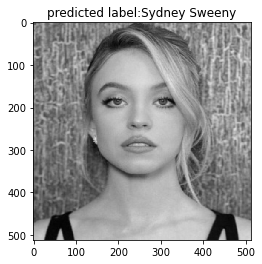

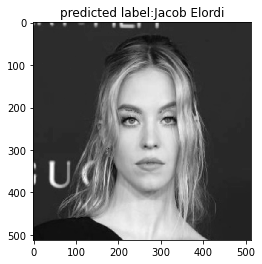

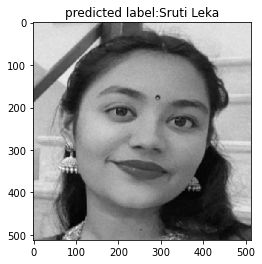

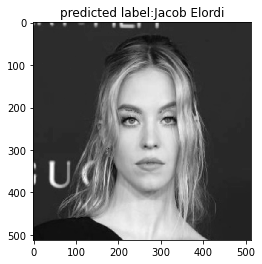

In [36]:
for i in (np.random.randint(0,6,4)):  
    predicted_images=(np.reshape(x_test[i],(512,512)).astype(np.float64))
    plt.title("predicted label:{0}".format(y_pred[i]))
    plt.imshow(predicted_images,interpolation="nearest", cmap="gray")
    plt.show()

### Check Accuracy 

In [37]:
accuracy = metrics.accuracy_score(y_test,y_pred)

In [38]:
accuracy

0.8333333333333334

In [39]:
confusion_matrix(y_test, y_pred)

array([[2, 0, 0],
       [0, 1, 0],
       [1, 0, 2]], dtype=int64)